Togo Solar Data - Exploratory Data Analysis (EDA)
Prepared as part of the 10 Academy Challenge Task 2


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('../data/togo-dapaong_qc.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


## Summary Statistics & Missing Values

In [2]:
# Summary statistics
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [3]:
# Missing values
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

Comments    525600
dtype: int64

In [4]:
# Columns with >5% missing
threshold = 0.05 * len(df)
missing[missing > threshold]

Comments    525600
dtype: int64

## Outlier Detection & Cleaning

In [5]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[columns_to_check].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Outliers found: {outliers.sum()}")
df_cleaned = df[~outliers]

# Impute missing with median
df_cleaned[columns_to_check] = df_cleaned[columns_to_check].fillna(df_cleaned[columns_to_check].median())

# Save cleaned file
df_cleaned.to_csv('../data/togo_clean.csv', index=False)

Outliers found: 9251


## Time Series Analysis

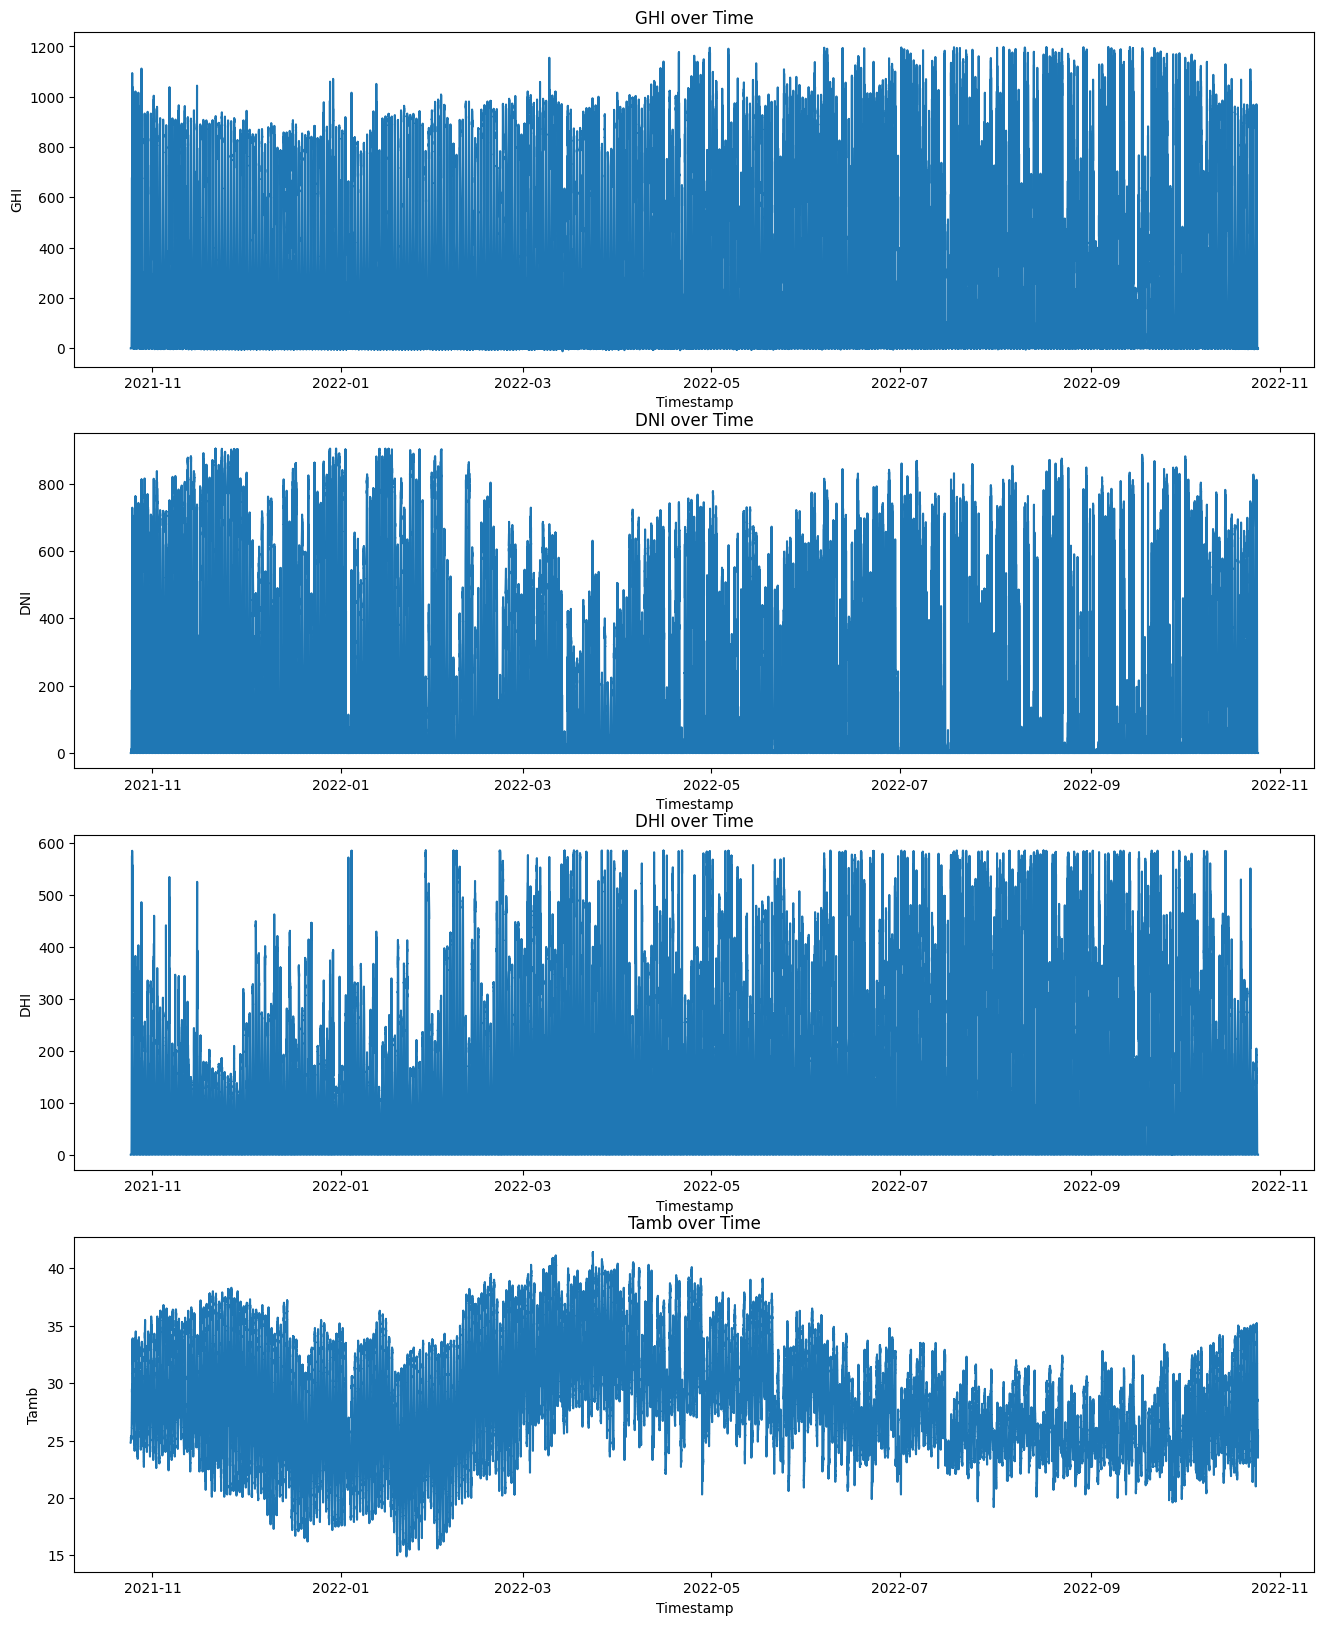

In [6]:
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])
fig, axs = plt.subplots(4, 1, figsize=(16, 20))
for i, col in enumerate(['GHI', 'DNI', 'DHI', 'Tamb']):
    sns.lineplot(x='Timestamp', y=col, data=df_cleaned, ax=axs[i])
    axs[i].set_title(f'{col} over Time')

<Axes: title={'center': 'Hourly Trends'}, xlabel='hour'>

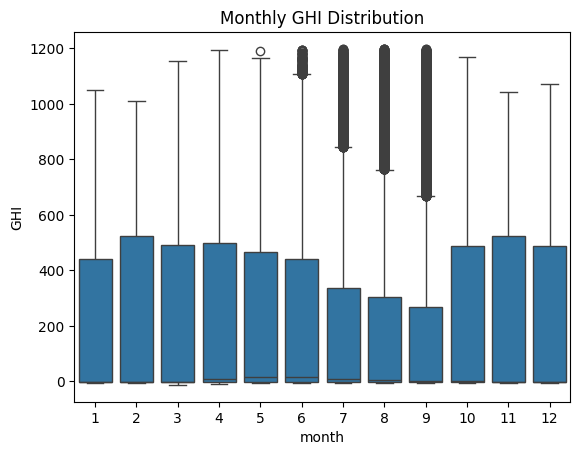

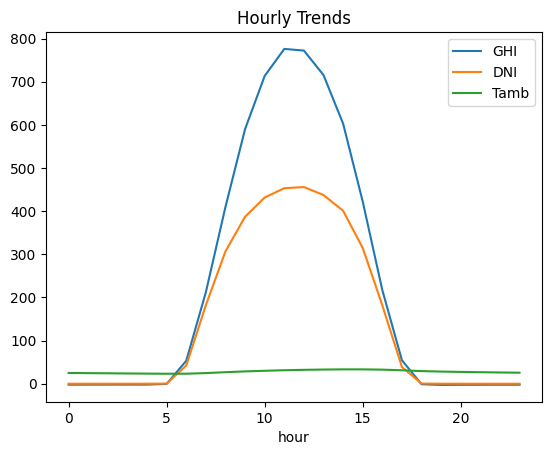

In [7]:
df_cleaned['month'] = df_cleaned['Timestamp'].dt.month
df_cleaned['hour'] = df_cleaned['Timestamp'].dt.hour

sns.boxplot(x='month', y='GHI', data=df_cleaned)
plt.title("Monthly GHI Distribution")
df_cleaned.groupby('hour')[['GHI', 'DNI', 'Tamb']].mean().plot(title="Hourly Trends")

## Cleaning Impact

<Axes: title={'center': 'Effect of Cleaning on ModA & ModB'}, xlabel='Cleaning'>

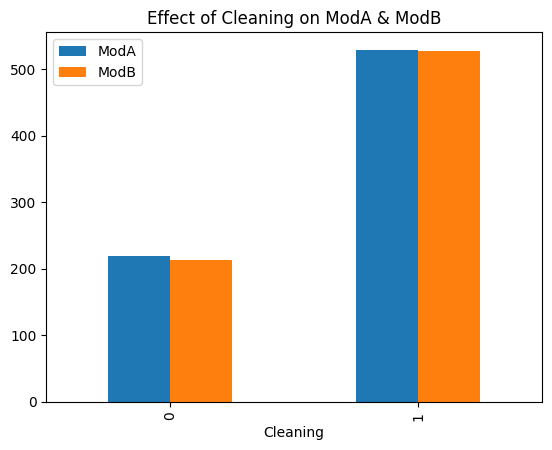

In [8]:
df_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', title="Effect of Cleaning on ModA & ModB")

## Correlation & Relationship Analysis

<Axes: >

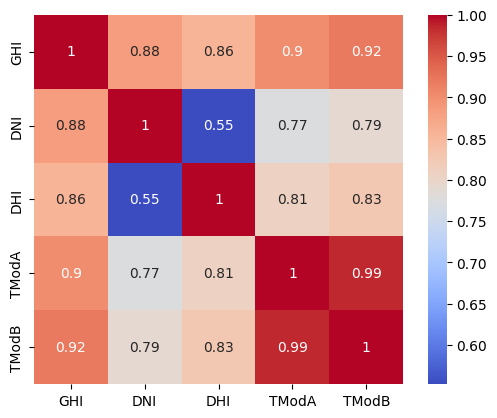

In [9]:
corr = df_cleaned[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)

<Axes: xlabel='WS', ylabel='GHI'>

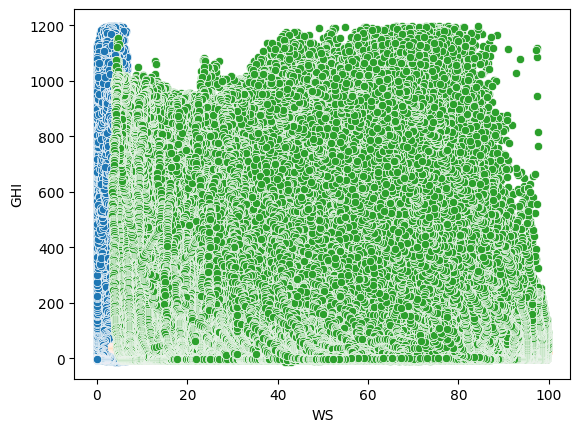

In [10]:
sns.scatterplot(x='WS', y='GHI', data=df_cleaned)
sns.scatterplot(x='RH', y='Tamb', data=df_cleaned)
sns.scatterplot(x='RH', y='GHI', data=df_cleaned)

## Wind & Distribution Analysis

Text(0.5, 1.0, 'Wind Speed Distribution')

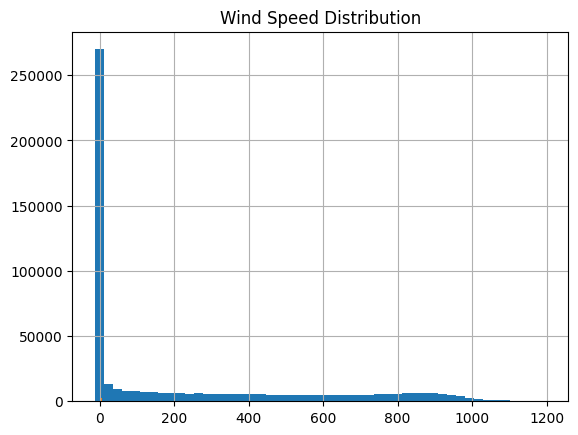

In [11]:
# Histograms
df_cleaned['GHI'].hist(bins=50)
plt.title("GHI Distribution")

df_cleaned['WS'].hist(bins=50)
plt.title("Wind Speed Distribution")

## Temperature & Humidity Analysis

Text(0.5, 1.0, 'Relative Humidity vs Ambient Temperature')

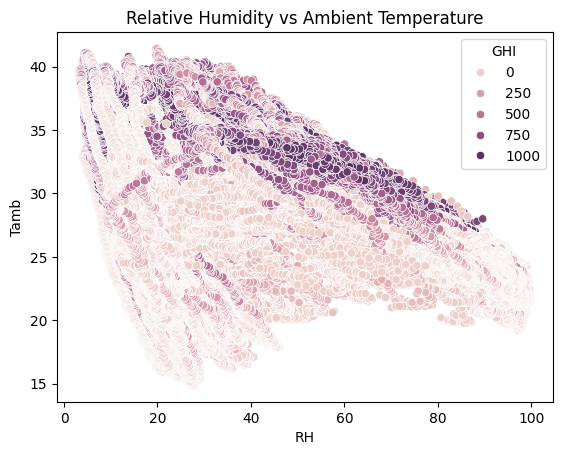

In [12]:
sns.scatterplot(x='RH', y='Tamb', hue='GHI', data=df_cleaned)
plt.title("Relative Humidity vs Ambient Temperature")

## Bubble Chart

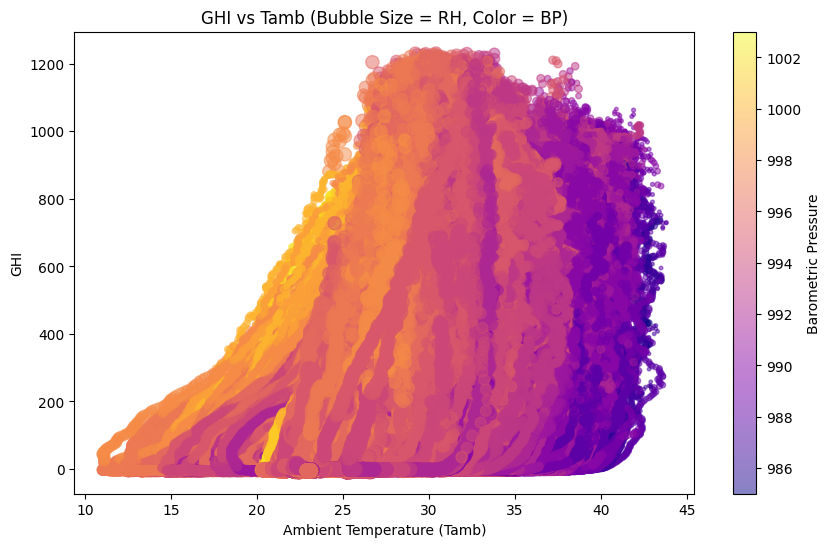

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_cleaned['Tamb'], df_cleaned['GHI'],
    s=df_cleaned['RH'], alpha=0.5,
    c=df_cleaned['BP'], cmap='plasma'
)
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('GHI')
plt.title('GHI vs Tamb (Bubble Size = RH, Color = BP)')
plt.colorbar(label='Barometric Pressure')